In [16]:
import os
import torch
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from dataset import ADNI
from nilearn.image import load_img, smooth_img, clean_img
from visualization_aid import preprocess_for_plot3d, plot_cube

data_path = atlas_path = '../data'
data_path = '/project/ajiteshs_1045/alzheimers/temp_t1linear_brains/'
# splits_path = '../splits_t1volume_toy'
splits_path = '../splits_t1linear_toy'
num_classes=3
depth_of_slice=40
slicing_stride=5

data_type = 't1_linear'
train_dataset: ADNI = ADNI(
    data_path,
    data_type,
    atlas_path,
    splits_path,
    # dynamic_length=argv.dynamic_length, 
    k_fold=None,
    # smoothing_fwhm=argv.fwhm,
    num_classes=num_classes,
    depth_of_slice=depth_of_slice,
    slicing_stride=slicing_stride,
    parallize_brains=False
)

ADNI Dataset Processing using 22 processes
..Parallizing over slices processing
Loading Saved slices..


In [4]:
sample = train_dataset.subject_tsv.iloc[0]
participant_id, session_id = sample['participant_id'], sample['session_id']
if data_type == "t1_volume":
    suffix = 't1/spm/segmentation/normalized_space'
    seg_substring = 'Space_T1w'
elif data_type == 't1_linear':
    suffix = 't1_linear'
    seg_substring = 'Sym_res-1x1x1_T1w.nii'
        
data_dir = os.path.join(data_path, 'processed', 'subjects')
path = os.path.join(data_dir, participant_id,
        session_id, suffix)
all_segs = list(os.listdir(path))
img_filename = [
    seg_name for seg_name in all_segs 
    if seg_substring in seg_name
]
assert len(img_filename) == 1
img_filename = img_filename[0]
ni_img = load_img(os.path.join(path, img_filename))
img = np.asanyarray(ni_img.dataobj)
img.shape

(193, 229, 193)

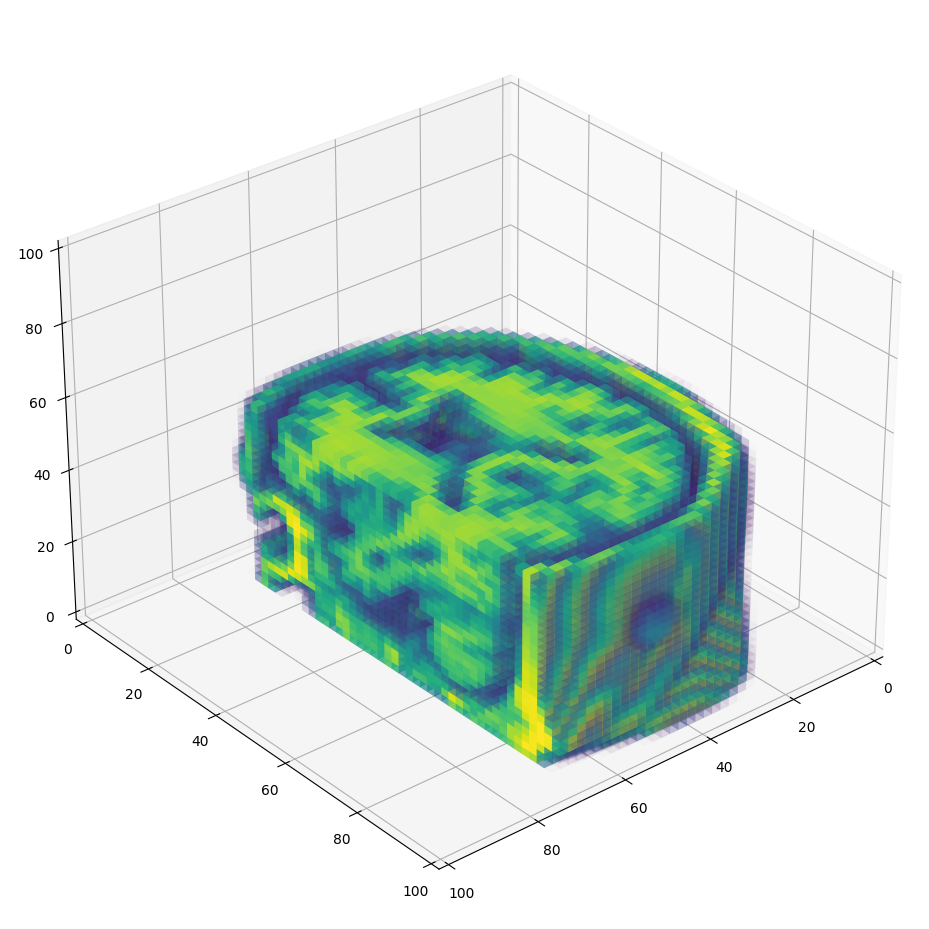

In [18]:
IMG_DIM=50

resized = preprocess_for_plot3d(img, IMG_DIM)
plot_cube(resized[:35,::-1,:25], IMG_DIM)

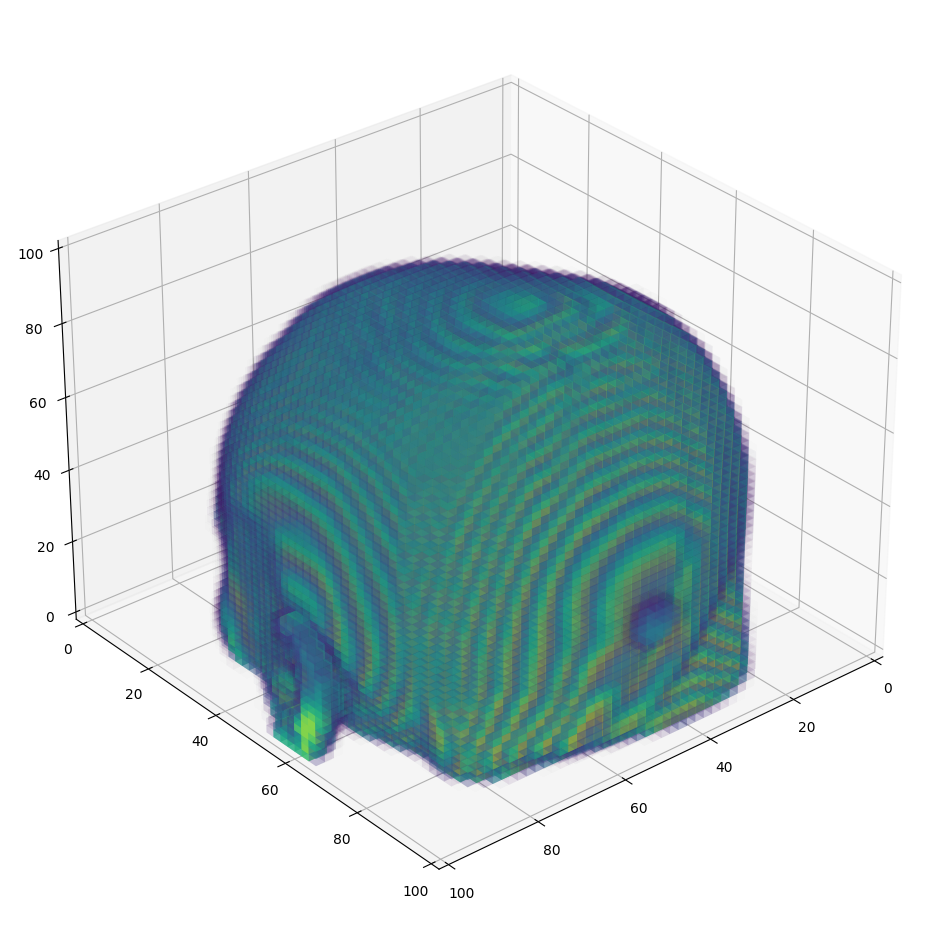

In [19]:
plot_cube(resized[:,::-1,:], IMG_DIM)

[]

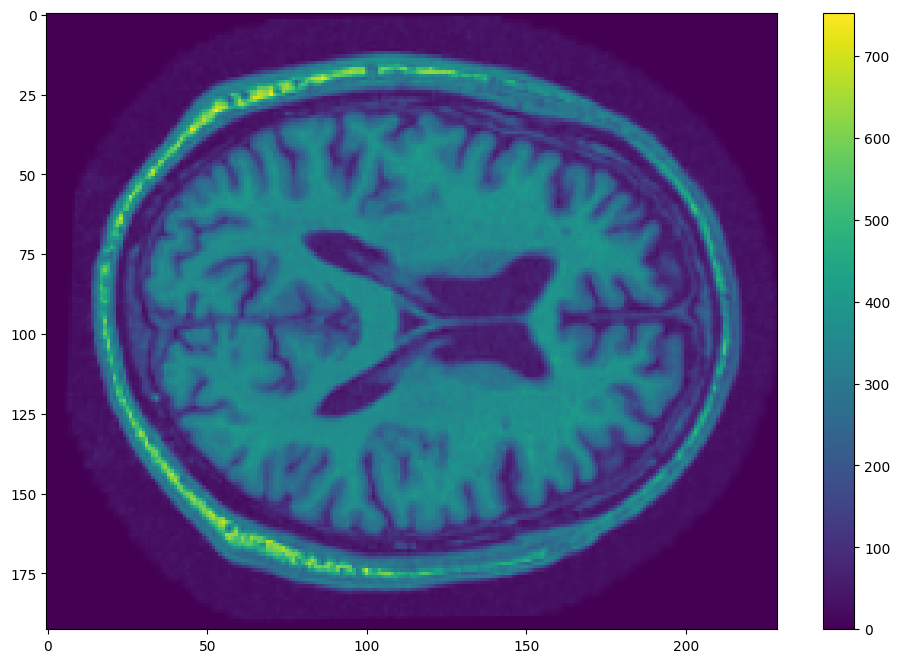

In [12]:
plt.imshow(img[:,:,95].squeeze())
plt.colorbar()
plt.plot()

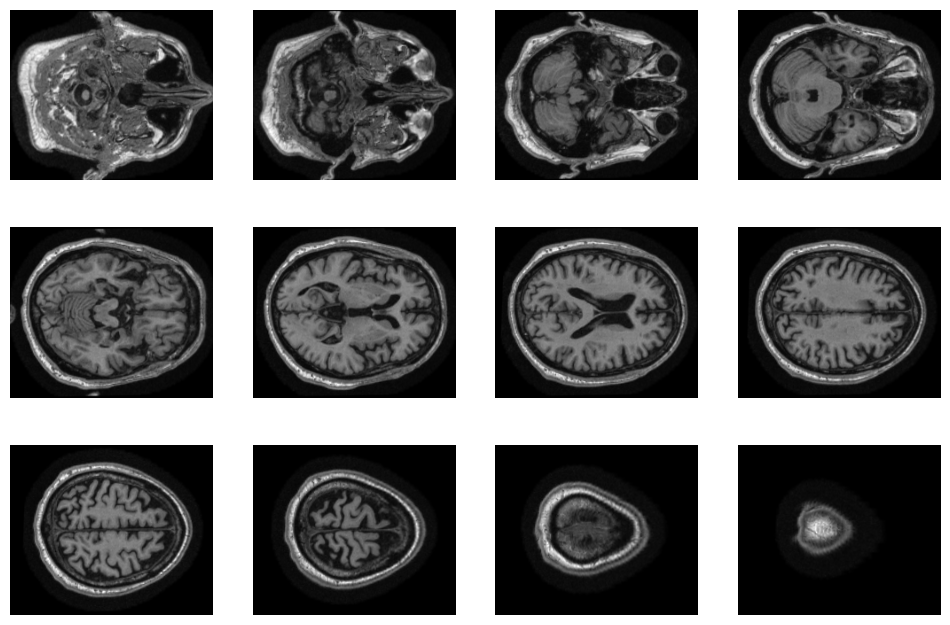

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

rows, cols = 3, 4
fig, ax = plt.subplots(nrows=rows, ncols=cols)

selections = list(range(0, img.shape[2], int(img.shape[2]/(rows*cols))))
options = []
x = 0
for j in range(rows):
    for i in range(cols):
        options.append((selections[x], j, i))
        x += 1
        
# print(options)

for s, i, j in options:
    ax[i][j].axis('off')
    ax[i][j].imshow(img[:,:,s].squeeze(), cmap='gray')

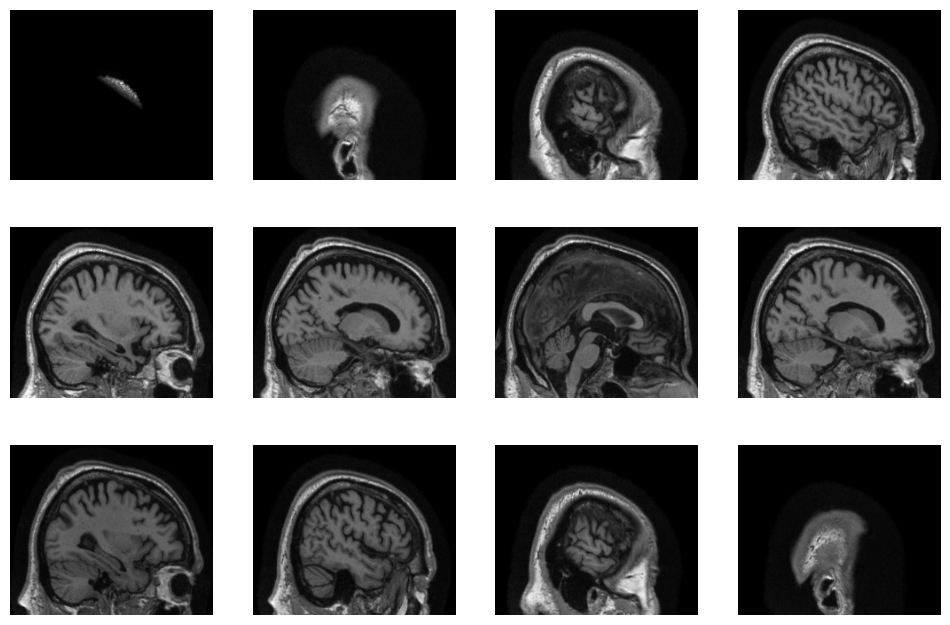

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
# print(img.shape)
img_proc = torch.tensor(img.squeeze()).rot90(k=1, dims=[0,2])
# print(img_proc.shape)
rows, cols = 3, 4
fig, ax = plt.subplots(nrows=rows, ncols=cols)

selections = list(range(0, img.shape[2], int(img_proc.shape[2]/(rows*cols))))
options = []
x = 0
for j in range(rows):
    for i in range(cols):
        options.append((selections[x], j, i))
        x += 1
        
# print(options)

for s, i, j in options:
    ax[i][j].axis('off')
    ax[i][j].imshow(img_proc[:,:,s].squeeze(), cmap='gray')

[]

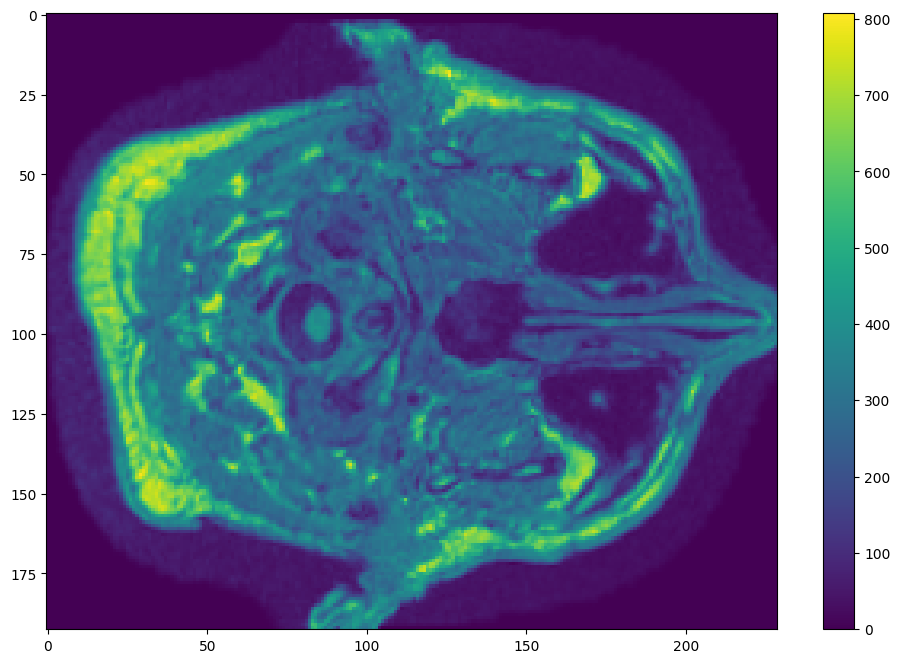

: 

In [20]:
plt.imshow(img[:,:,0].squeeze())
plt.colorbar()
plt.plot()